In [24]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler , OneHotEncoder
from sklearn.feature_selection import SelectKBest , f_classif

In [25]:
# Load cleaned dataset
df = pd.read_csv("R:/Customer Churn Prediction with Casual Analysis/data/processed/telco_churn_cleaned.csv")
print("Dataset shape : ",df.shape)
df.head()

Dataset shape :  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
# Target Variable Encoding
df['Churn'] = df['Churn'].map({'No' : 0 , 'Yes' : 1})
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [27]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include = ['object']).columns.tolist()
categorical_cols.remove('customerID')

In [28]:
numerical_cols = ['tenure','MonthlyCharges','TotalCharges']

In [29]:
print("Categorical columns:" , categorical_cols)
print("Numerical columns :" , numerical_cols)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns : ['tenure', 'MonthlyCharges', 'TotalCharges']


In [30]:
# Dataset 1 : For tree-based model (Random Forest , XGBoost) - Use Label Encoding
df_tree= df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_tree[col] = le.fit_transform(df_tree[col].astype(str))
    label_encoders[col] = le

print("Tree models dataset (label encoded) : ")
display(df_tree.head())

Tree models dataset (label encoded) : 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [31]:
# Dataset 2 : For linear models (Logistic Regression) - Use One-Hot Encoding
df_linear = df.copy()
df_linear = pd.get_dummies(df_linear , columns = categorical_cols , drop_first = True)
print("Linear models dataset (one-hot encoded) shape:" , df_linear.shape)
display(df_linear.head())

Linear models dataset (one-hot encoded) shape: (7043, 32)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,0,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,1,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,1,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [32]:
## FEATURE ENGINEERING FOR BOTH DATASETS
def add_engineered_features(df):

    df_engineered = df.copy()

    # 1. Tenure groups
    df_engineered['tenure_group'] = pd.cut(df_engineered['tenure'],bins=[-1,12,24,48,72,np.inf],labels = ['0-1yr','1-2yr','2-4yr','4-6yr' , '6+yr'])

    # For tree models , we need to encode the tenure_group
    if 'tenure_group' in df_engineered.columns and df_engineered['tenure_group'].dtype.name == 'category' :
        le_tenure = LabelEncoder()
        df_engineered['tenure_group'] = le_tenure.fit_transform(df_engineered['tenure_group'])

    # 2. Monthly charge per tenure (average monthly revenue) - handle division by zero
    df_engineered['charge_per_tenure'] = np.where(df_engineered['tenure'] > 0, df_engineered['TotalCharges'] / df_engineered['tenure'],0)

    # 3. Ratio of monthly charges to total charges - handle division by zero
    df_engineered['charge_ratio'] = np.where(df_engineered['TotalCharges'] > 0 , df_engineered['MonthlyCharges'] / df_engineered['TotalCharges'],0)

    # 4. Interaction features(only for tree models as they can handle interactions well)
    if 'InternetService' in df_engineered.columns and 'tenure' in df_engineered.columns:
        df_engineered['internet_tenure'] = df_engineered['InternetService'] * df_engineered['tenure']

    if 'Contract' in df_engineered.columns and 'tenure' in df_engineered.columns:
        df_engineered['contract_tenure'] = df_engineered['Contract'] * df_engineered['tenure']

    return df_engineered






In [33]:
# Apply feature engineering to both datasets
df_tree_engineered = add_engineered_features(df_tree)
df_linear_engineered = add_engineered_features(df_linear)

In [34]:
print("Engineered features for tree models:")
display(df_tree_engineered[['tenure','MonthlyCharges','TotalCharges','tenure_group','charge_per_tenure','charge_ratio','internet_tenure','contract_tenure']].head())

Engineered features for tree models:


,tenure,MonthlyCharges,TotalCharges,tenure_group,charge_per_tenure,charge_ratio,internet_tenure,contract_tenure
0,1,29.85,29.85,0,29.850000,1.000000,0,0
1,34,56.95,1889.50,2,55.573529,0.030140,0,34
2,2,53.85,108.15,0,54.075000,0.497920,0,0
3,45,42.30,1840.75,2,40.905556,0.022980,0,45
4,2,70.70,151.65,0,75.825000,0.466205,2,0


In [35]:
def prepare_dataset(df, model_type='tree'):
    # Separate features and target
    X = df.drop(['Churn', 'customerID'], axis=1, errors='ignore')
    y = df['Churn']
    
    # Identify numerical features to scale
    numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 
                         'charge_per_tenure', 'charge_ratio']
    
    # Add interaction features if they exist (mainly for tree models)
    if 'internet_tenure' in df.columns:
        numerical_features.append('internet_tenure')
    if 'contract_tenure' in df.columns:
        numerical_features.append('contract_tenure')
    
    numerical_features = [col for col in numerical_features if col in X.columns]
    
    # Scale numerical features (more important for linear models)
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    
    return X_scaled, y, scaler, numerical_features

# ## NOW prepare datasets for modeling

# Prepare tree model dataset
X_tree, y_tree, scaler_tree, tree_num_features = prepare_dataset(df_tree_engineered, 'tree')

# Prepare linear model dataset (needs scaling)
X_linear, y_linear, scaler_linear, linear_num_features = prepare_dataset(df_linear_engineered, 'linear')

print(f"Tree dataset shape: {X_tree.shape}")
print(f"Linear dataset shape: {X_linear.shape}")


Tree dataset shape: (7043, 24)
Linear dataset shape: (7043, 33)


In [36]:
# ## Feature Selection

# For tree models, we can use all features as they handle high dimensionality well
# For linear models, we should select the most important features

In [37]:
# Feature selection for linear models
selector = SelectKBest(score_func=f_classif, k=15)
selector.fit(X_linear, y_linear)


SelectKBest(k=15)

In [38]:
# Get feature scores
feature_scores = pd.DataFrame({
    'feature': X_linear.columns,
    'score': selector.scores_,
    'p_value': selector.pvalues_
}).sort_values('score', ascending=False)

print("Top 15 features for linear models by ANOVA F-score:")
display(feature_scores.head(15))

Top 15 features for linear models by ANOVA F-score:


,feature,score,p_value
1,tenure,997.268010,7.999058e-205
30,tenure_group,953.850910,1.556404e-196
32,charge_ratio,797.098667,3.175131e-166
10,InternetService_Fiber optic,738.046042,1.200784e-154
25,Contract_Two year,707.919254,1.048134e-148
28,PaymentMethod_Electronic check,706.195028,2.296890e-148
12,OnlineSecurity_No internet service,385.698588,1.200504e-83
22,StreamingMovies_No internet service,385.698588,1.200504e-83
20,StreamingTV_No internet service,385.698588,1.200504e-83
18,TechSupport_No internet service,385.698588,1.200504e-83


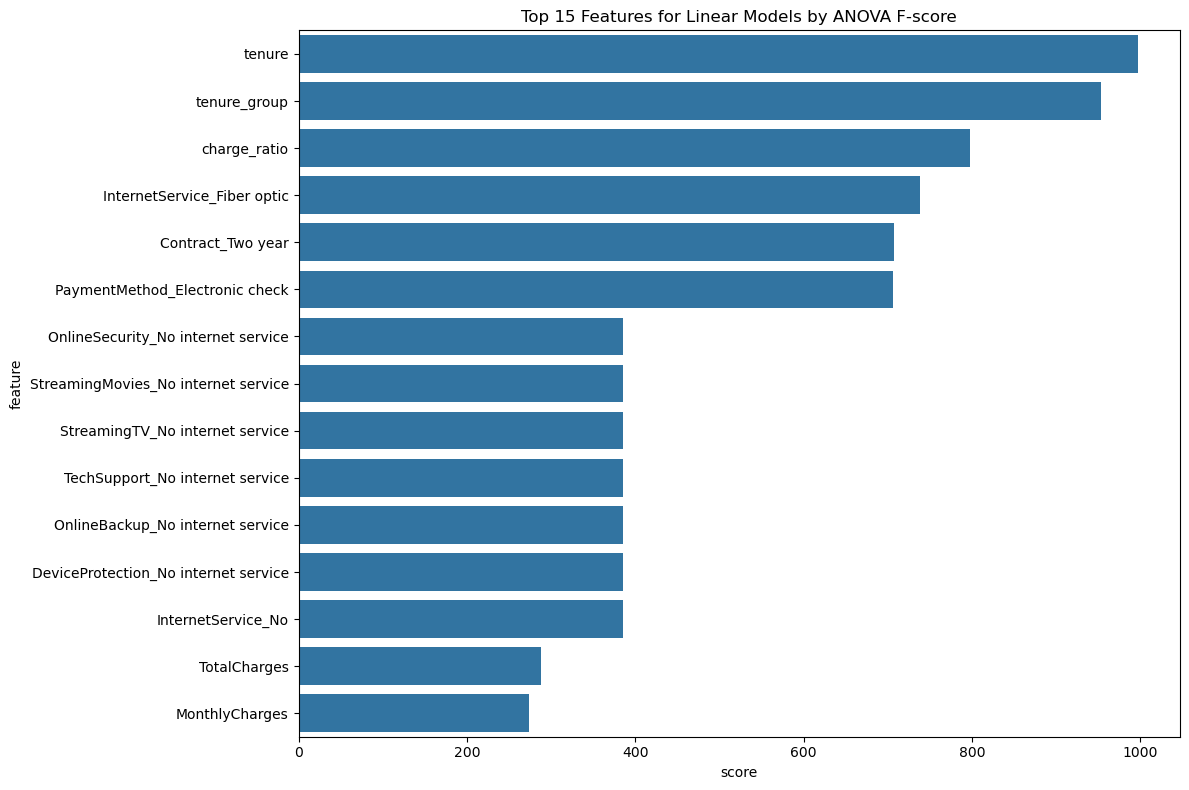

In [39]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='feature', data=feature_scores.head(15))
plt.title('Top 15 Features for Linear Models by ANOVA F-score')
plt.tight_layout()
plt.savefig('../results/feature_importance_linear.png', dpi=300, bbox_inches='tight')
plt.show()


In [40]:
# Select top features for linear models
top_features_linear = feature_scores.head(15)['feature'].tolist()
X_linear_selected = X_linear[top_features_linear]

In [41]:
# For tree models, we'll use all features
X_tree_selected = X_tree

In [42]:
# Create final datasets with selected features
final_df_tree = pd.concat([X_tree_selected, y_tree], axis=1)
final_df_linear = pd.concat([X_linear_selected, y_linear], axis=1)

print("Final dataset shapes:")
print(f"- Tree models: {final_df_tree.shape}")
print(f"- Linear models: {final_df_linear.shape}")

Final dataset shapes:
- Tree models: (7043, 25)
- Linear models: (7043, 16)


In [43]:
# Save the processed datasets
final_df_tree.to_csv('R:/Customer Churn Prediction with Casual Analysis/data/processed/telco_churn_tree_models.csv', index=False)
final_df_linear.to_csv('R:/Customer Churn Prediction with Casual Analysis/data/processed/telco_churn_linear_models.csv', index=False)

print("Processed datasets saved to '../data/processed/'")

Processed datasets saved to '../data/processed/'


In [44]:
import joblib

In [45]:
# Save the feature names and scalers for later use
joblib.dump(list(X_tree_selected.columns), 'R:/Customer Churn Prediction with Casual Analysis/models/feature_names_tree.pkl')
joblib.dump(top_features_linear, 'R:/Customer Churn Prediction with Casual Analysis/models/feature_names_linear.pkl')
joblib.dump(scaler_tree, 'R:/Customer Churn Prediction with Casual Analysis/models/scaler_tree.pkl')
joblib.dump(scaler_linear, 'R:/Customer Churn Prediction with Casual Analysis/models/scaler_linear.pkl')
joblib.dump(label_encoders, 'R:/Customer Churn Prediction with Casual Analysis/models/label_encoders.pkl')

['R:/Customer Churn Prediction with Casual Analysis/models/label_encoders.pkl']

In [46]:
print("Feature names, scalers, and label encoders saved to '../models/'")

Feature names, scalers, and label encoders saved to '../models/'
